## **REGRESSOR**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ETİ DATA.xlsx')
data

,AMONYAK,SU,GLUTEN INDEKSI,KURU GLUTEN,YAS GLUTEN,ISKARTA,GIRDI AGIRLIK,CIKTI AGIRLIK,GIRDI CIKTI AGIRLIK FARKI,KALINLIK,GRUP,KIRIK
0,9,57,42,8.35,25.1,20,10.4,9.12,1.28,7.68,1,10
1,9,57,42,8.35,25.1,20,10.2,8.90,1.30,7.90,2,2
2,9,57,42,8.35,25.1,20,10.5,9.11,1.39,7.80,3,1
3,9,57,42,8.35,25.1,20,10.7,9.25,1.45,7.60,1,8
4,9,57,42,8.35,25.1,20,10.2,9.33,0.87,7.80,2,2
5,9,57,42,8.35,25.1,20,10.5,9.26,1.24,7.70,3,0
6,9,57,42,8.35,25.1,20,10.6,9.40,1.20,7.80,1,1
7,9,57,42,8.35,25.1,20,10.2,9.24,0.96,7.90,2,3
8,9,57,42,8.35,25.1,20,10.5,9.21,1.29,7.75,3,0
9,9,57,42,8.35,25.1,20,10.5,9.17,1.33,7.20,1,7


In [ ]:
scaler = MinMaxScaler()

df = scaler.fit_transform(data)

dataset = df

In [ ]:
x1, y1 = df[:, 0:10], df[:, 10:11]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
print(x_train)

[[0.         0.6        0.23076923 0.26666668 0.         0.75
  0.375      0.25       0.43636364 0.        ]
 [0.         0.8        0.7692308  1.         0.9444444  0.
  0.875      0.         0.8181818  0.5       ]
 [0.         0.8        0.7692308  1.         0.9444444  0.
  0.8125     0.         0.4181818  0.5       ]
 [0.         0.4        0.46153846 0.53333336 0.33333334 0.
  0.875      0.5        0.4181818  0.5       ]
 [0.         0.4        0.46153846 0.53333336 0.33333334 0.75
  0.35       0.5        0.6363636  1.        ]
 [0.         0.         0.61538464 0.         0.7222222  0.75
  0.125      0.5        0.36363637 1.        ]
 [0.         0.         0.61538464 0.         0.7222222  0.75
  0.4375     0.5        0.6909091  0.5       ]
 [0.         0.4        0.46153846 0.53333336 0.33333334 1.
  0.3125     0.5        0.72727275 0.        ]
 [0.         0.4        0.46153846 0.53333336 0.33333334 0.
  0.0375     0.5        0.47272727 0.5       ]
 [0.         0.6        0.230

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd')
model.fit(x_train, y_train, epochs=200, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


Epoch 1/200
6/6 - 0s - loss: 0.3574 - val_loss: 0.1465 - 462ms/epoch - 77ms/step
Epoch 2/200
6/6 - 0s - loss: 0.1040 - val_loss: 0.0761 - 56ms/epoch - 9ms/step
Epoch 3/200
6/6 - 0s - loss: 0.0669 - val_loss: 0.0688 - 52ms/epoch - 9ms/step
Epoch 4/200
6/6 - 0s - loss: 0.0585 - val_loss: 0.0698 - 35ms/epoch - 6ms/step
Epoch 5/200
6/6 - 0s - loss: 0.0510 - val_loss: 0.0702 - 46ms/epoch - 8ms/step
Epoch 6/200
6/6 - 0s - loss: 0.0481 - val_loss: 0.0708 - 52ms/epoch - 9ms/step
Epoch 7/200
6/6 - 0s - loss: 0.0454 - val_loss: 0.0724 - 56ms/epoch - 9ms/step
Epoch 8/200
6/6 - 0s - loss: 0.0425 - val_loss: 0.0700 - 38ms/epoch - 6ms/step
Epoch 9/200
6/6 - 0s - loss: 0.0407 - val_loss: 0.0704 - 37ms/epoch - 6ms/step
Epoch 10/200
6/6 - 0s - loss: 0.0385 - val_loss: 0.0707 - 35ms/epoch - 6ms/step
Epoch 11/200
6/6 - 0s - loss: 0.0377 - val_loss: 0.0683 - 51ms/epoch - 9ms/step
Epoch 12/200
6/6 - 0s - loss: 0.0377 - val_loss: 0.0663 - 37ms/epoch - 6ms/step
Epoch 13/200
6/6 - 0s - loss: 0.0355 - val_loss

In [ ]:
model.summary()
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 71ms/step


In [ ]:
test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

print(y_train)
print(train_set_predictions)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

1/1 [==============================] - 0s 34ms/step
Test R2 square: 0.34651328168268125
Test MAE:  0.17076726
Test MSE:  0.047494136
1/1 [==============================] - 0s 34ms/step
[[0.07142857]
 [0.5714286 ]
 [0.35714287]
 [0.14285715]
 [0.14285715]
 [0.35714287]
 [0.35714287]
 [0.07142857]
 [0.35714287]
 [0.07142857]
 [0.14285715]
 [0.71428573]
 [0.        ]
 [0.35714287]
 [0.21428572]
 [0.07142857]
 [0.07142857]
 [0.14285715]
 [0.21428572]
 [0.5       ]
 [0.14285715]
 [0.        ]
 [0.71428573]
 [0.5714286 ]
 [0.        ]
 [0.14285715]
 [0.5       ]
 [0.        ]
 [0.5       ]
 [0.14285715]]
[[0.29864112]
 [0.52131265]
 [0.3714295 ]
 [0.28472698]
 [0.14819299]
 [0.31843406]
 [0.17348692]
 [0.14092728]
 [0.3365329 ]
 [0.11640988]
 [0.13338302]
 [0.5675576 ]
 [0.05699091]
 [0.3047071 ]
 [0.1672235 ]
 [0.24637084]
 [0.08394375]
 [0.1768193 ]
 [0.14273337]
 [0.34253097]
 [0.20550448]
 [0.12101954]
 [0.26242575]
 [0.3165501 ]
 [0.07706174]
 [0.16588673]
 [0.28168887]
 [0.06803914]
 [

In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(data)
def backnorm(x):
  denormalized_data=np.zeros((n,1))
  for i in range(n):
    for j in range(1):

       denormalized_data[i,j]= x[i,j]*(np.max(dataset.iloc[:,10+j]-np.min(dataset.iloc[:,10+j])))+np.min(dataset.iloc[:,10+j])

  return denormalized_data

14


In [ ]:
test_set_predictions_deno= backnorm(test_set_predictions)

In [ ]:
y_test_deno= backnorm(y_test)

In [ ]:
test_set_predictions_deno

array([[4.81605649],
       [1.62973836],
       [6.19735438],
       [4.83434463],
       [1.68544401],
       [7.30056596],
       [1.75760511],
       [7.57978129],
       [3.75421059],
       [5.04260582],
       [4.6094538 ],
       [7.93168187],
       [0.92376854],
       [0.46578503]])

In [ ]:
y_test_deno

array([[ 8.00000036],
       [ 1.00000004],
       [ 1.00000004],
       [ 3.00000003],
       [ 6.00000006],
       [14.        ],
       [ 2.00000009],
       [10.00000024],
       [ 1.00000004],
       [ 4.00000018],
       [ 4.00000018],
       [ 5.00000012],
       [ 1.00000004],
       [ 2.00000009]])

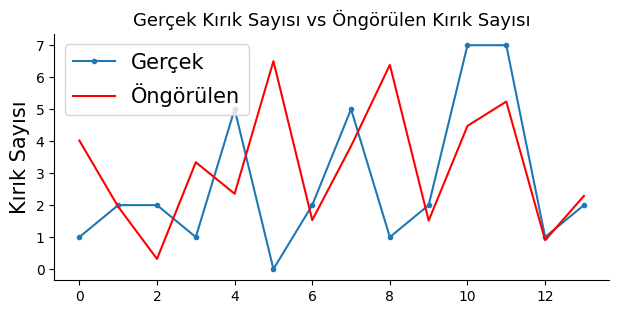

In [ ]:
aa=[x for x in range(14)]
plt.figure(figsize=(6,3))
plt.plot(aa, y_test_deno[:14,0], marker='.', label="Gerçek")
plt.plot(aa, test_set_predictions_deno[:14,0], 'r', label="Öngörülen")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('Kırık Sayısı', size=15)
plt.title("Gerçek Kırık Sayısı vs Öngörülen Kırık Sayısı", fontsize =13)
plt.legend(fontsize=15)


plt.show();

## **REGRESSOR II**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ ETİ Fazla data.xlsx')
data

,AMONYAK,SU,GLUTEN INDEKSI,KURU GLUTEN,YAS GLUTEN,ISKARTA,GIRDI AGIRLIK,CIKTI AGIRLIK,GIRDI CIKTI AGIRLIK FARKI,KALINLIK,GRUP,KIRIK
0,9,57,42,8.35,25.1,20,10.4,9.12,1.28,7.68,1,10
1,9,57,42,8.35,25.1,20,10.2,8.90,1.30,7.90,2,2
2,9,57,42,8.35,25.1,20,10.5,9.11,1.39,7.80,3,1
3,9,57,42,8.35,25.1,20,10.6,9.25,1.45,7.60,1,8
4,9,57,42,8.35,25.1,20,10.2,9.33,0.87,7.80,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
96,9,53,40,7.60,24.7,30,10.5,9.15,1.35,7.55,3,2
97,9,53,40,7.60,24.7,30,10.2,9.32,0.88,7.70,1,1
98,9,53,40,7.60,24.7,30,10.5,9.28,1.22,7.55,2,7
99,9,53,40,7.60,24.7,30,10.6,9.15,1.45,7.40,3,3


In [ ]:
scaler = MinMaxScaler()

df = scaler.fit_transform(data)

dataset = df

In [ ]:
x1, y1 = df[:, 0:10], df[:, 10:11]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd')
model.fit(x_train, y_train, epochs=200, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)

Epoch 1/200
13/13 - 1s - loss: 0.2213 - val_loss: 0.2511 - 1s/epoch - 80ms/step
Epoch 2/200
13/13 - 0s - loss: 0.1681 - val_loss: 0.2413 - 61ms/epoch - 5ms/step
Epoch 3/200
13/13 - 0s - loss: 0.1593 - val_loss: 0.2346 - 148ms/epoch - 11ms/step
Epoch 4/200
13/13 - 0s - loss: 0.1517 - val_loss: 0.2318 - 118ms/epoch - 9ms/step
Epoch 5/200
13/13 - 0s - loss: 0.1494 - val_loss: 0.2316 - 91ms/epoch - 7ms/step
Epoch 6/200
13/13 - 0s - loss: 0.1476 - val_loss: 0.2293 - 93ms/epoch - 7ms/step
Epoch 7/200
13/13 - 0s - loss: 0.1453 - val_loss: 0.2285 - 80ms/epoch - 6ms/step
Epoch 8/200
13/13 - 0s - loss: 0.1434 - val_loss: 0.2247 - 90ms/epoch - 7ms/step
Epoch 9/200
13/13 - 0s - loss: 0.1411 - val_loss: 0.2223 - 106ms/epoch - 8ms/step
Epoch 10/200
13/13 - 0s - loss: 0.1384 - val_loss: 0.2234 - 129ms/epoch - 10ms/step
Epoch 11/200
13/13 - 0s - loss: 0.1380 - val_loss: 0.2226 - 84ms/epoch - 6ms/step
Epoch 12/200
13/13 - 0s - loss: 0.1373 - val_loss: 0.2221 - 96ms/epoch - 7ms/step
Epoch 13/200
13/13 -

KeyboardInterrupt: ignored

In [ ]:
model.summary()
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)

In [ ]:
test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

print(y_train)
print(train_set_predictions)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

In [ ]:
n=y_test.shape[0]
print(n)
dataset=pd.DataFrame(data)
def backnorm(x):
  denormalized_data=np.zeros((n,1))
  for i in range(n):
    for j in range(1):

       denormalized_data[i,j]=x[i,j]*(np.max(dataset.iloc[:,10+j]-np.min(dataset.iloc[:,10+j])))+np.min(dataset.iloc[:,10+j])

  return denormalized_data

In [ ]:
test_set_predictions_deno= backnorm(test_set_predictions)

In [ ]:
y_test_deno= backnorm(y_test)

In [ ]:
y_test_deno

array([[ 1.00000001],
       [ 2.00000003],
       [ 2.00000003],
       [ 1.00000001],
       [ 5.        ],
       [ 0.        ],
       [ 2.00000003],
       [ 5.        ],
       [ 1.00000001],
       [ 2.00000003],
       [ 6.99999988],
       [ 6.99999988],
       [ 1.00000001],
       [ 2.00000003],
       [ 8.99999976],
       [ 8.00000012],
       [ 3.00000012],
       [ 1.00000001],
       [ 3.00000012],
       [ 8.99999976],
       [ 4.00000006],
       [ 5.        ],
       [ 2.00000003],
       [ 5.        ],
       [10.        ],
       [ 1.00000001],
       [ 6.99999988],
       [ 1.00000001],
       [ 1.00000001],
       [ 4.00000006],
       [ 2.00000003]])

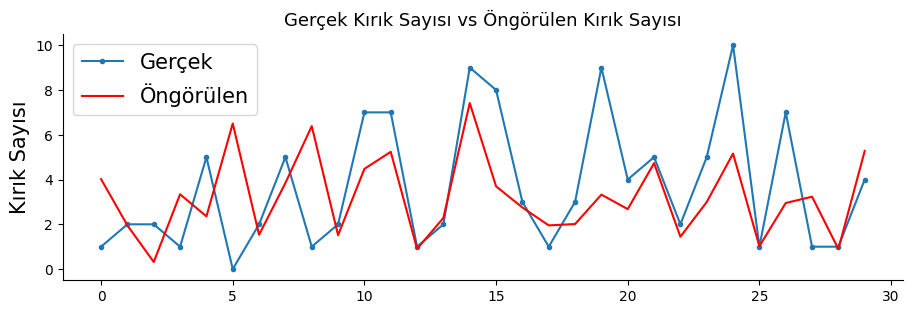

In [ ]:
aa=[x for x in range(30)]
plt.figure(figsize=(9,3))
plt.plot(aa, y_test_deno[:30,0], marker='.', label="Gerçek")
plt.plot(aa, test_set_predictions_deno[:30,0], 'r', label="Öngörülen")

plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.05)
plt.ylabel('Kırık Sayısı', size=15)
plt.title("Gerçek Kırık Sayısı vs Öngörülen Kırık Sayısı", fontsize =13)
plt.legend(fontsize=15)


plt.show();

## **CORRELATION MATRIX**

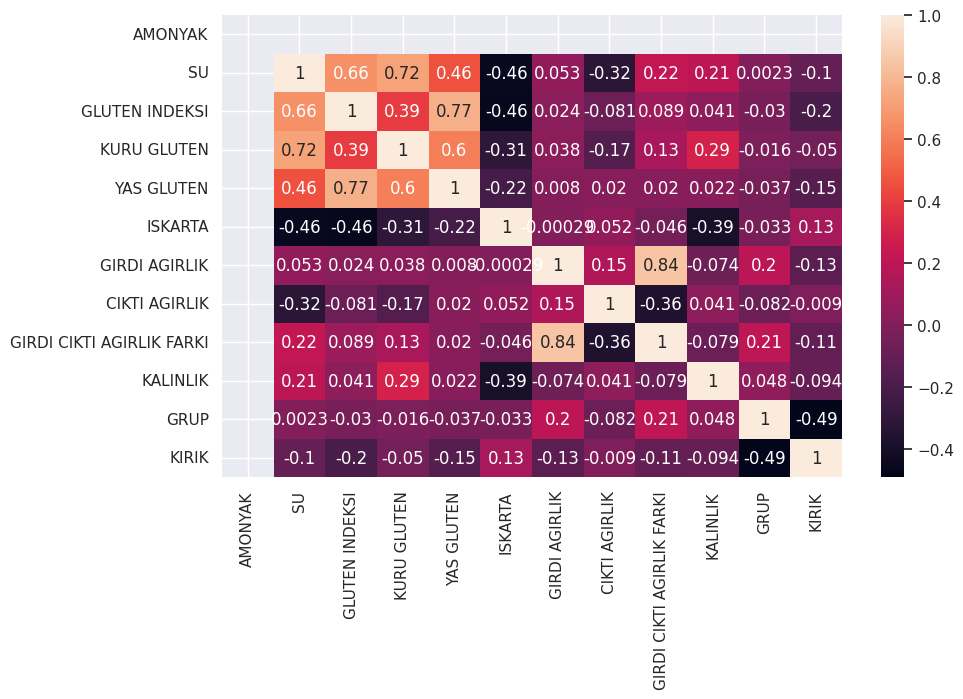

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
sns.set (rc = {'figure.figsize':(10, 6)})
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()